In [1]:
# Machine Learning : Project - 2
# PGDCSAI - Kavya Gupta

In [2]:
# Import the required libraries and load the data:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [4]:
df1 = pd.read_csv("Copy of events.csv")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3252950 entries, 0 to 3252949

Data columns (total 5 columns):

 #   Column     Dtype  

---  ------     -----  

 0   event_id   int64  

 1   device_id  int64  

 2   timestamp  object 

 3   longitude  float64

 4   latitude   float64

dtypes: float64(2), int64(2), object(1)

memory usage: 124.1+ MB


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [5]:
df2 = pd.read_csv("Copy of gender_age.csv")
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 74645 entries, 0 to 74644

Data columns (total 4 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   device_id  74645 non-null  int64 

 1   gender     74645 non-null  object

 2   age        74645 non-null  int64 

 3   group      74645 non-null  object

dtypes: int64(2), object(2)

memory usage: 2.3+ MB


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [6]:
df3 = pd.read_csv("Copy of phone_device.csv")
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 187245 entries, 0 to 187244

Data columns (total 3 columns):

 #   Column        Non-Null Count   Dtype 

---  ------        --------------   ----- 

 0   device_id     187245 non-null  int64 

 1   phone_brand   187245 non-null  object

 2   device_model  187245 non-null  object

dtypes: int64(1), object(2)

memory usage: 4.3+ MB


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [7]:
# Data cleansing and Exploratory data analysis:

In [8]:
# Check if there are any duplicate records in the dataset? If any drop them.

In [9]:
df1[df1.duplicated()]

,event_id,device_id,timestamp,longitude,latitude


In [10]:
df2[df2.duplicated()]

,device_id,gender,age,group


In [11]:
df3[df3.duplicated()]

,device_id,phone_brand,device_model
22625,1877775838486905855,vivo,Y13
22639,-3766087376657242966,金立,V183
34350,-6238937574958215831,OPPO,R7s
34352,8973197758510677470,联想,A368t
34356,387904771848178909,魅族,MX3
...,...,...,...
187158,5291632655539907005,三星,Galaxy S4
187189,-8977849817626954804,华为,荣耀4A
187194,-7137644614871452665,HTC,One M8
187196,-3105831442627717296,华为,荣耀6


In [12]:
#Dropping duplicates in 'Copy of phone_device.csv' -

df3.drop_duplicates(inplace=True)
df3[df3.duplicated()]

,device_id,phone_brand,device_model


In [13]:
#Merge the data into a single data-frame :

dfcomb = df1.merge(df2,on='device_id', how='left').merge(df3,on='device_id', how='left')
dfcomb.info()
dfcomb.head()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 3253129 entries, 0 to 3253128

Data columns (total 10 columns):

 #   Column        Dtype  

---  ------        -----  

 0   event_id      int64  

 1   device_id     int64  

 2   timestamp     object 

 3   longitude     float64

 4   latitude      float64

 5   gender        object 

 6   age           float64

 7   group         object 

 8   phone_brand   object 

 9   device_model  object 

dtypes: float64(3), int64(2), object(5)

memory usage: 273.0+ MB


,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46.0,M39+,小米,红米note
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,NaN,NaN,NaN,三星,Galaxy Grand Prime
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,M,47.0,M39+,魅族,MX4 Pro
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,M,30.0,M29-31,vivo,Y27
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,F,28.0,F27-28,酷派,大神F2


In [14]:
# Check for missing values in each column of the dataset? If it exists, handle them accordingly.

dfcomb.isnull().sum()

event_id              0
device_id             0
timestamp             0
longitude             0
latitude              0
gender          2037513
age             2037513
group           2037513
phone_brand       92533
device_model      92533
dtype: int64

In [15]:
dfcomb.isnull().sum()/len(dfcomb)*100

event_id         0.000000
device_id        0.000000
timestamp        0.000000
longitude        0.000000
latitude         0.000000
gender          62.632407
age             62.632407
group           62.632407
phone_brand      2.844431
device_model     2.844431
dtype: float64

In [16]:
# dropping null values :

dfcomb.dropna(inplace=True)
dfcomb.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [17]:
# Check the statistical summary for the numerical and categorical columns and write your findings.

dfcomb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
event_id,1215616.0,1.626674e+06,9.396635e+05,1.000000e+00,8.123215e+05,1.627308e+06,2.440378e+06,3.252948e+06
device_id,1215616.0,-3.106798e+16,5.322372e+18,-9.222957e+18,-4.672948e+18,-1.173809e+17,4.631837e+18,9.220915e+18
longitude,1215616.0,7.839264e+01,5.381290e+01,-1.800000e+02,0.000000e+00,1.127500e+02,1.171700e+02,1.511800e+02
latitude,1215616.0,2.182718e+01,1.564838e+01,-3.380000e+01,0.000000e+00,2.857000e+01,3.401000e+01,5.364000e+01
age,1215616.0,3.350004e+01,9.745614e+00,1.100000e+01,2.700000e+01,3.100000e+01,3.900000e+01,8.900000e+01


In [18]:
dfcomb.select_dtypes(include=object).describe().transpose()

,count,unique,top,freq
timestamp,1215616,497663,2016-05-03 10:00:03,18
gender,1215616,2,M,864324
group,1215616,12,M39+,211020
phone_brand,1215616,89,华为,375959
device_model,1215616,926,荣耀6,54987


In [ ]:
# Observations -

# We can see that we have data for 89 different Phone Brands and 926 different device models.
# The Male above 39 years of age is the most common demographic.

In [ ]:
# Perform the data visualization on the dataset to gain some basic insights about the data.

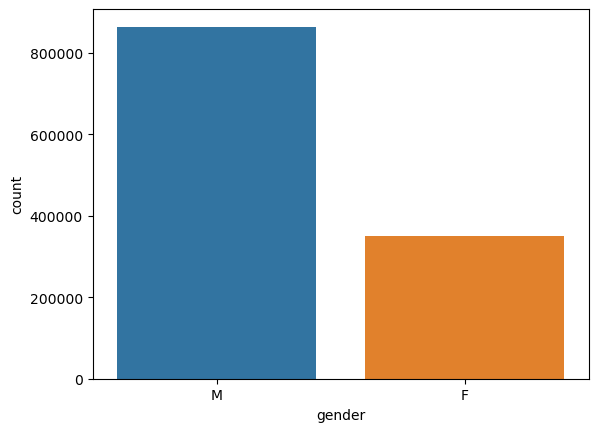

In [19]:
sns.countplot(dfcomb, x='gender')
plt.show()

In [ ]:
# Observations

# Males are far more common than females.

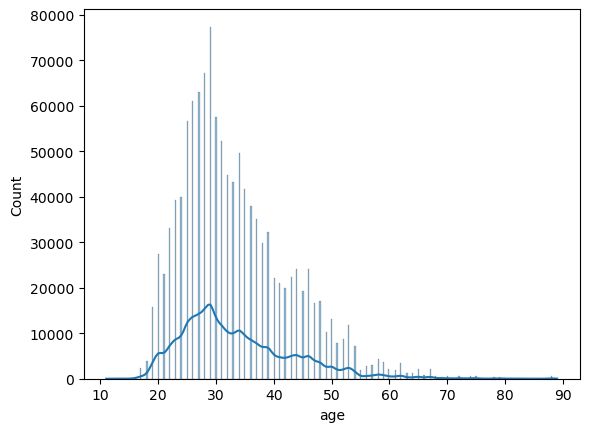

In [20]:
sns.histplot(dfcomb, x='age', kde=True)
plt.show()

In [ ]:
# Observations

# 29 years of age is the most common.

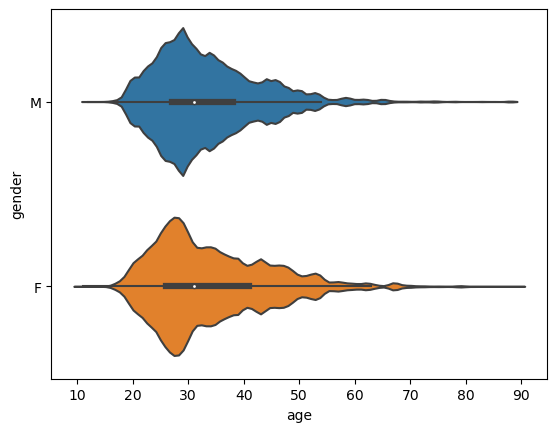

In [21]:
sns.violinplot(data=dfcomb, y='gender', x='age')
plt.show()

In [ ]:
# Observations

# the most common age of females is slightly lower than that of males.

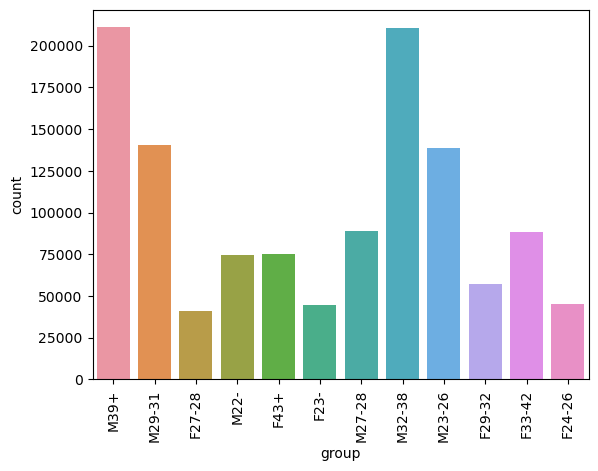

In [22]:
sns.countplot(x='group', data=dfcomb)

plt.xticks(rotation=90)
plt.show()

In [ ]:
# Observations

# In males, 39+ years and 32-38 years are the most frequent groups while in females, 33-42 is the most frequent one.

In [23]:
# Encode the categorical variables in the dataset.

catvar = [i for i in dfcomb.columns if dfcomb.dtypes[i] == object]
catvar

label1 = LabelEncoder()

def encoder(df):
    for i in catvar:
        q = label1.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(dfcomb)

dfcomb.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,1,29182687948017175,3013,121.38,31.24,1,46.0,11,34,864
2,3,-4833982096941402721,635,106.60,29.70,1,47.0,11,87,419
3,4,-6815121365017318426,565,104.27,23.28,1,30.0,9,8,744
4,5,-5373797595892518570,595,115.88,28.66,0,28.0,2,80,822
5,6,1476664663289716375,1641,0.00,0.00,1,19.0,6,21,423


In [24]:
# Drop irrelevant columns like 'timestamp','event_id','device_id' etc from the dataset.

In [25]:
dfcomb.drop(['timestamp','event_id','device_id'], axis=1, inplace=True)
dfcomb.info()
dfcomb.head()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1215616 entries, 0 to 3253126

Data columns (total 7 columns):

 #   Column        Non-Null Count    Dtype  

---  ------        --------------    -----  

 0   longitude     1215616 non-null  float64

 1   latitude      1215616 non-null  float64

 2   gender        1215616 non-null  int32  

 3   age           1215616 non-null  float64

 4   group         1215616 non-null  int32  

 5   phone_brand   1215616 non-null  int32  

 6   device_model  1215616 non-null  int32  

dtypes: float64(3), int32(4)

memory usage: 55.6 MB


,longitude,latitude,gender,age,group,phone_brand,device_model
0,121.38,31.24,1,46.0,11,34,864
2,106.60,29.70,1,47.0,11,87,419
3,104.27,23.28,1,30.0,9,8,744
4,115.88,28.66,0,28.0,2,80,822
5,0.00,0.00,1,19.0,6,21,423


In [26]:
# Data Preparation for model building -

df=dfcomb.copy()

In [27]:
# Standardize the data, so that the values are within a particular range.

mm = MinMaxScaler()

df.iloc[:,:] = mm.fit_transform(df.iloc[:,:])
df.head()

,longitude,latitude,gender,age,group,phone_brand,device_model
0,0.910019,0.743824,1.0,0.448718,1.000000,0.386364,0.934054
2,0.865390,0.726212,1.0,0.461538,1.000000,0.988636,0.452973
3,0.858355,0.652790,1.0,0.243590,0.818182,0.090909,0.804324
4,0.893411,0.714318,0.0,0.217949,0.181818,0.909091,0.888649
5,0.543511,0.386551,1.0,0.102564,0.545455,0.238636,0.457297


In [28]:
# Principal Component Analysis -

In [29]:
# covariance matrix :

cov_matrix = np.cov(df.transpose())
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 

 [[ 2.64024761e-02  2.76101830e-02  4.10293387e-03  7.49064264e-05

   2.57352316e-03 -3.93708088e-03  3.90993817e-03]

 [ 2.76101830e-02  3.20271728e-02  2.92778121e-03  5.45461562e-04

   2.43381425e-03 -4.44489691e-03  3.85995363e-03]

 [ 4.10293387e-03  2.92778121e-03  2.05471870e-01 -1.93844498e-03

   1.14431142e-01  6.36463668e-03  4.98334457e-03]

 [ 7.49064264e-05  5.45461562e-04 -1.93844498e-03  1.56109465e-02

   1.53390609e-02 -4.17235574e-05 -4.11360290e-04]

 [ 2.57352316e-03  2.43381425e-03  1.14431142e-01  1.53390609e-02

   8.66753546e-02  2.73762999e-03  2.34523021e-03]

 [-3.93708088e-03 -4.44489691e-03  6.36463668e-03 -4.17235574e-05

   2.73762999e-03  7.76742246e-02  1.01658143e-02]

 [ 3.90993817e-03  3.85995363e-03  4.98334457e-03 -4.11360290e-04

   2.34523021e-03  1.01658143e-02  8.47759136e-02]]


In [30]:
# Calculate the eigenvalues and eigenvectors :

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigen vectors:','\n',eig_vecs)
print('\nEigen values:','\n',eig_vals)

Eigen vectors: 

 [[-2.12919626e-02  1.86420950e-02 -2.83244796e-01 -6.05950062e-01

   2.56524025e-02  7.42069103e-01  2.17125166e-02]

 [-1.77438962e-02  1.64969379e-02 -3.11312442e-01 -6.73718814e-01

   4.59687777e-03 -6.69443543e-01 -2.06092066e-02]

 [-8.52468655e-01 -3.12725205e-02  6.78968877e-03  3.10208617e-02

   3.92858044e-01  6.74739273e-04 -3.42013056e-01]

 [-2.42597530e-02 -1.13867534e-02 -2.97436210e-03 -1.31634987e-02

  -6.85323769e-01  3.26648510e-02 -7.26886525e-01]

 [-5.19340458e-01 -3.74813094e-02 -9.56459385e-03  4.72866159e-03

  -6.12330231e-01 -9.98350982e-03  5.94742647e-01]

 [-3.53486172e-02  5.66160859e-01  7.52874680e-01 -3.33455882e-01

  -1.23206731e-02  6.69165719e-05  6.88797294e-03]

 [-3.12478381e-02  8.22392685e-01 -5.05855945e-01  2.58024659e-01

  -1.46492748e-02 -3.41562784e-03 -7.84580728e-04]]



Eigen values: 

 [0.27574038 0.09164975 0.07418576 0.05304054 0.03041145 0.00144853

 0.00216155]


In [31]:
total = sum(eig_vals)

var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print('Variance Explained: ',var_exp)
print('\nCummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [52.160534272655745, 17.336959788745748, 14.033377984144343, 10.033433941873358, 5.752793050646713, 0.4088898151623468, 0.2740111467717365]



Cummulative Variance Explained:  [ 52.16053427  69.49749406  83.53087205  93.56430599  99.31709904

  99.72598885 100.        ]


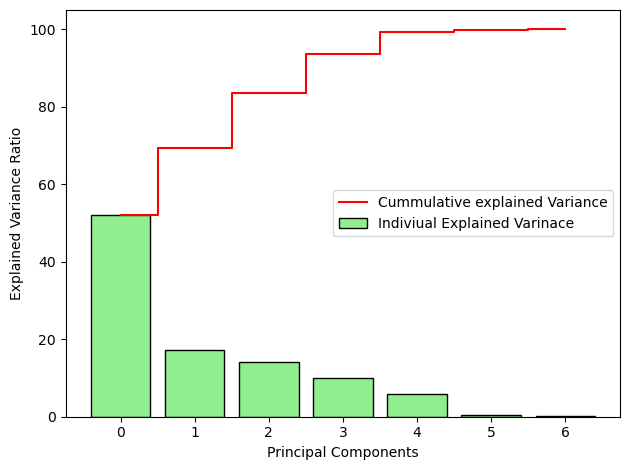

In [32]:
plt.bar(range(7),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(7), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

In [33]:
pdf = df.copy()

In [34]:
# choosing principal components as 4 as 90-95% of the variance in data is explained by the same.

pca = PCA(n_components=4)
pdf = pca.fit_transform(pdf)

headers = ['1','2','3','4']
pdf = pd.DataFrame(pdf, columns=headers)
                   
pdf.head()

,1,2,3,4
0,-0.441245,-0.239418,-0.161062,-0.094089
1,-0.446550,-0.183495,0.553817,-0.380311
2,-0.324630,0.027860,-0.272555,0.065436
3,0.825556,-0.561795,0.271067,-0.282021
4,-0.162521,0.228048,0.189301,0.297351


In [35]:
# K Means Clustering -

In [36]:
kdf=pdf.copy()

In [37]:
cluster_range = range(1,11)
cluster_errors = []

for k in cluster_range:
    clusters = KMeans(n_clusters=k)
    clusters.fit(kdf)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,601263.160049
1,2,274307.321787
2,3,210334.494649
3,4,161013.896289
4,5,135977.939146
5,6,115613.507791
6,7,100203.607207
7,8,88767.536057
8,9,73046.269887
9,10,62981.687407


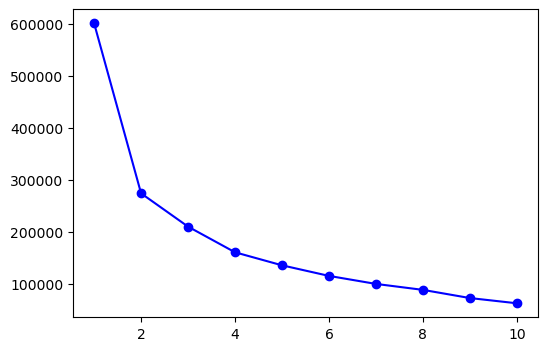

In [38]:
# Find the optimal K Value using elbow plot for K means clustering.

plt.figure(figsize=[6,4])
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [39]:
# Build a K means clustering model using the obtained optimal K value from the elbow plot -

# Optimal K = 4

kmeans = KMeans(n_clusters=4, random_state=999)

kmeans.fit(kdf)

KMeans(n_clusters=4, random_state=999)

In [40]:
# obtained labels from kmeans clustering
kmeans.labels_

# creating a new dataframe for labels
klabelsdf = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
klabelsdf.head()

,Labels
0,3
1,2
2,3
3,1
4,0


In [41]:
# converting it into categorical variables -

klabelsdf['Labels'] = klabelsdf['Labels'].astype('category')

In [42]:
# adding the label dataframe to the initial dataframe

kmeansdf = kdf.join(klabelsdf)
kmeansdf.head()

,1,2,3,4,Labels
0,-0.441245,-0.239418,-0.161062,-0.094089,3
1,-0.446550,-0.183495,0.553817,-0.380311,2
2,-0.324630,0.027860,-0.272555,0.065436,3
3,0.825556,-0.561795,0.271067,-0.282021,1
4,-0.162521,0.228048,0.189301,0.297351,0


In [43]:
kmeansdf['Labels'].value_counts()

3    400497
1    351292
0    325316
2    138511
Name: Labels, dtype: int64

In [44]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1215616 entries, 0 to 1215615

Data columns (total 4 columns):

 #   Column  Non-Null Count    Dtype  

---  ------  --------------    -----  

 0   1       1215616 non-null  float64

 1   2       1215616 non-null  float64

 2   3       1215616 non-null  float64

 3   4       1215616 non-null  float64

dtypes: float64(4)

memory usage: 37.1 MB


In [45]:
kdf1 = kdf.sample(frac=.02)
kdf1.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 24312 entries, 995274 to 801530

Data columns (total 4 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   1       24312 non-null  float64

 1   2       24312 non-null  float64

 2   3       24312 non-null  float64

 3   4       24312 non-null  float64

dtypes: float64(4)

memory usage: 949.7 KB


In [46]:
# Compute silhouette score for evaluating the quality of the K means clustering technique -

for i in range(2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(kdf1)
    labels = kmeans.predict(kdf1)
    print(i,silhouette_score(kdf1,labels))

2 0.5367939468534233

3 0.40578259188201815

4 0.4528285002279694

5 0.40549455130892464


In [57]:
# Observations

# highest silhouette score is at K=2, and thus optimal clusters should be chosen as K = 2.

In [47]:
# Agglomerative clustering -

In [48]:
adf = pdf.copy()

In [49]:
# Take a sample of the dataset for agglomerative clustering to reduce the computational time

adf1 = adf.sample(frac=.02)
adf1.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 24312 entries, 1147085 to 1097930

Data columns (total 4 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   1       24312 non-null  float64

 1   2       24312 non-null  float64

 2   3       24312 non-null  float64

 3   4       24312 non-null  float64

dtypes: float64(4)

memory usage: 949.7 KB


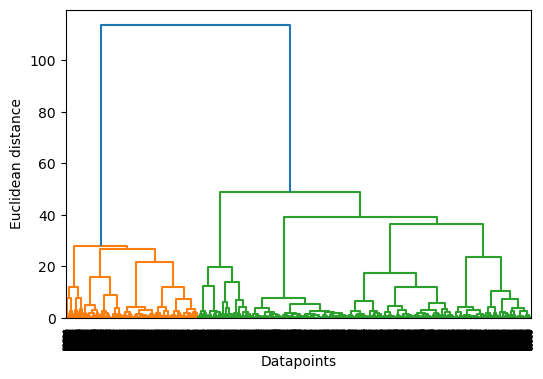

In [50]:
plt.figure(figsize=[6,4])
merg = linkage(adf1, method='ward')

dendrogram(merg, leaf_rotation=90,)

plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')

plt.show()

In [51]:
# Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram

hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(adf1)

In [52]:
# Creating a dataframe of the labels

aglabelsdf = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
aglabelsdf.head()

,Labels
0,0
1,0
2,1
3,0
4,0


In [53]:
# joining the label dataframe with unscaled initial dataframe

aggdf = adf1.join(aglabelsdf)

In [54]:
# Compute silhouette score for evaluating the quality of the Agglomerative clustering technique -

for i in range(2,6):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(adf1)
    labels = hier.fit_predict(adf1)
    print(i,silhouette_score(adf1,labels))

2 0.5367046535462153

3 0.45380347494844175

4 0.3851031881443187

5 0.4518862068062598


In [58]:
# Observations

# highest silhouette score is at K=2, and thus optimal clusters should be chosen as K = 2.

In [55]:
# Perform cluster analysis by doing bi-variate analysis between cluster label and different features and write your conclusion on the results.

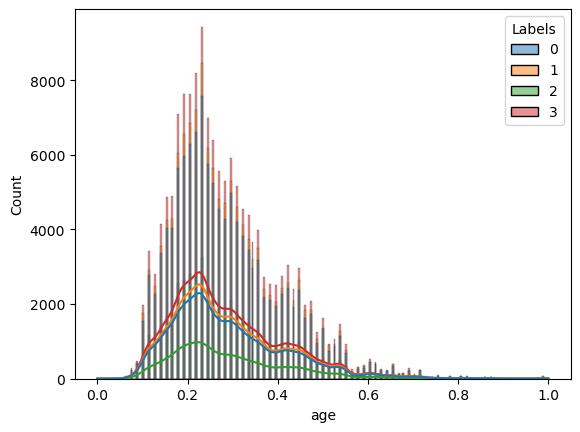

In [56]:
sns.histplot(kmeansdf, x=df['age'], kde=True, hue='Labels')
plt.show()

In [59]:
# Observations

#the distribution peaks for age across all is very similar.

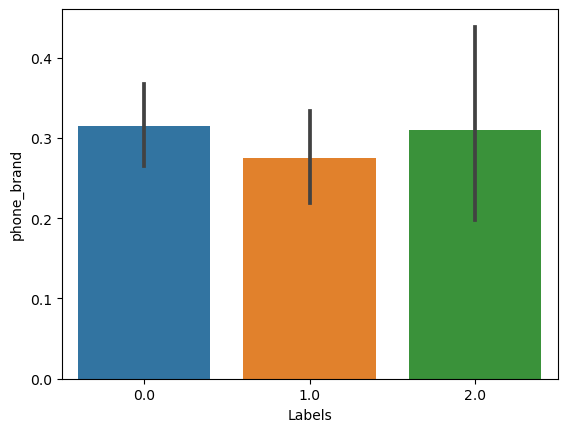

In [73]:
sns.barplot(x=aggdf['Labels'],y=df['phone_brand'])
plt.show()